In [1]:
#Libraries installed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SK-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Warnings
import warnings
warnings.filterwarnings("ignore")

plt.style.use("default")

### 1️⃣ LOAD THE DATA

In [2]:
df = pd.read_excel("Retail_Sales_Data.xlsx")

In [3]:
df.head()

,Date,Store_ID,Store_Location,Product_ID,Product_Category,Product_Subcategory,Brand,Unit_Price,Units_Sold,Total_Sales,...,Payment_Mode,Promotion_Applied,Stock_On_Hand,Store_Rating,Region,Holiday_Flag,Year,Month,Month_Num,Quarter
0,2023-04-13,STR_104,Chennai,PRD_072,Sports,Athletics,Reebok,29973.06,39,1168949.34,...,Debit Card,Yes,422,4.4,South,0,2023,Apr,4,Q2
1,2024-10-25,STR_103,Delhi,PRD_492,Sports,Outdoor,Yonex,46933.78,2,93867.56,...,UPI,No,302,4.1,North,0,2024,Oct,10,Q4
2,2023-02-28,STR_107,Kolkata,PRD_958,Groceries,Household,Nestle,39280.28,44,1728332.32,...,Cash,No,184,3.8,East,0,2023,Feb,2,Q1
3,2023-06-16,STR_102,Bangalore,PRD_014,Home Appliances,Kitchen,Whirlpool,40439.03,9,363951.27,...,UPI,Yes,493,3.7,South,0,2023,Jun,6,Q2
4,2024-05-23,STR_108,Ahmedabad,PRD_932,Fashion,Women Clothing,Puma,9193.58,4,36774.32,...,Credit Card,No,359,3.5,West,0,2024,May,5,Q2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73000 entries, 0 to 72999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 73000 non-null  datetime64[ns]
 1   Store_ID             73000 non-null  object        
 2   Store_Location       73000 non-null  object        
 3   Product_ID           73000 non-null  object        
 4   Product_Category     73000 non-null  object        
 5   Product_Subcategory  73000 non-null  object        
 6   Brand                73000 non-null  object        
 7   Unit_Price           73000 non-null  float64       
 8   Units_Sold           73000 non-null  int64         
 9   Total_Sales          73000 non-null  float64       
 10  Discount_Percentage  73000 non-null  int64         
 11  Revenue              73000 non-null  float64       
 12  Customer_Type        73000 non-null  object        
 13  Payment_Mode         73000 non-

In [5]:
df.describe()

,Date,Unit_Price,Units_Sold,Total_Sales,Discount_Percentage,Revenue,Stock_On_Hand,Store_Rating,Holiday_Flag,Year,Month_Num
count,73000,73000.000000,73000.000000,7.300000e+04,73000.000000,7.300000e+04,73000.000000,73000.000000,73000.000000,73000.000000,73000.000000
mean,2023-12-31 11:52:59.835616256,25110.208554,24.894589,6.261382e+05,10.010411,5.634765e+05,274.624712,4.249421,0.012288,2023.499000,6.522822
min,2023-01-01 00:00:00,100.110000,1.000000,1.447000e+02,0.000000,1.229950e+02,50.000000,3.500000,0.000000,2023.000000,1.000000
25%,2023-07-03 00:00:00,12728.855000,13.000000,1.759852e+05,5.000000,1.575377e+05,162.000000,3.900000,0.000000,2023.000000,4.000000
50%,2023-12-31 00:00:00,25071.800000,25.000000,4.713577e+05,10.000000,4.223565e+05,274.000000,4.200000,0.000000,2023.000000,7.000000
75%,2024-06-30 00:00:00,37557.337500,37.000000,9.539864e+05,15.000000,8.571156e+05,387.000000,4.600000,0.000000,2024.000000,10.000000
max,2024-12-31 00:00:00,49999.850000,49.000000,2.447350e+06,20.000000,2.447350e+06,499.000000,5.000000,1.000000,2024.000000,12.000000
std,NaN,14393.607981,14.134824,5.448548e+05,7.064131,4.938905e+05,129.663977,0.434722,0.110167,0.500002,3.448374


In [6]:
pd.DataFrame(df.columns)

,0
0,Date
1,Store_ID
2,Store_Location
3,Product_ID
4,Product_Category
5,Product_Subcategory
6,Brand
7,Unit_Price
8,Units_Sold
9,Total_Sales


### 2️⃣ Basic Cleaning & Feature Engineering

In [7]:
# 1. Parse Date Column
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# 2. Sort by date
df = df.sort_values("Date")

In [9]:
# 3. Check for missing values
pd.DataFrame(df.isna().sum())

,0
Date,0
Store_ID,0
Store_Location,0
Product_ID,0
Product_Category,0
Product_Subcategory,0
Brand,0
Unit_Price,0
Units_Sold,0
Total_Sales,0


- In this dataset, there are no null values.
- If there was null values we would use mean or median for numeric columns and mode for categorical columns.

In [10]:
# 4. Time-based features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")
df["Quarter"] = df["Date"].dt.quarter

In [11]:
df.head()

,Date,Store_ID,Store_Location,Product_ID,Product_Category,Product_Subcategory,Brand,Unit_Price,Units_Sold,Total_Sales,...,Promotion_Applied,Stock_On_Hand,Store_Rating,Region,Holiday_Flag,Year,Month,Month_Num,Quarter,Month_Name
51331,2023-01-01,STR_107,Kolkata,PRD_469,Sports,Athletics,Adidas,25657.69,15,384865.35,...,Yes,54,4.1,East,0,2023,1,1,1,Jan
13569,2023-01-01,STR_103,Delhi,PRD_330,Electronics,Laptops,Sony,45314.07,2,90628.14,...,No,395,4.0,North,0,2023,1,1,1,Jan
39073,2023-01-01,STR_106,Hyderabad,PRD_134,Fashion,Women Clothing,Nike,30476.69,23,700963.87,...,No,59,4.7,South,0,2023,1,1,1,Jan
17255,2023-01-01,STR_108,Ahmedabad,PRD_100,Sports,Outdoor,Yonex,2953.99,45,132929.55,...,No,161,4.3,West,0,2023,1,1,1,Jan
63671,2023-01-01,STR_103,Delhi,PRD_954,Sports,Outdoor,Adidas,36137.91,18,650482.38,...,No,459,4.7,North,0,2023,1,1,1,Jan


### 3️⃣ Exploratory Data Analysis [EDA]

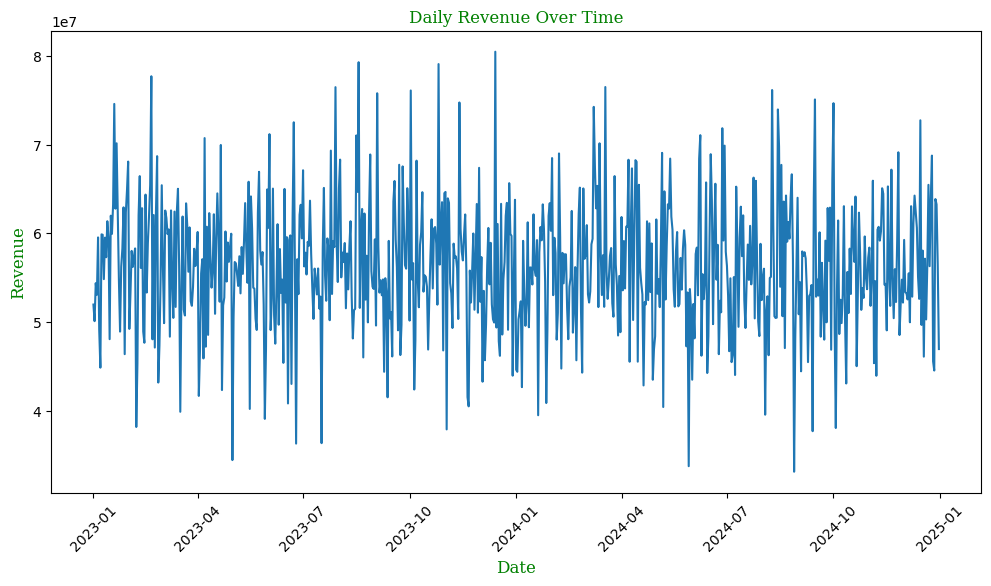

In [12]:
# Total Revenue over Time
from tkinter import font


daily_sales = df.groupby("Date")["Revenue"].sum().reset_index()

font_settings = {"family" : "serif",
                 "color" : "green",
                 "weight" : "normal",
                 "size" : 12}
plt.figure(figsize = (12,6))
plt.plot(daily_sales["Date"], daily_sales["Revenue"])
plt.title("Daily Revenue Over Time",fontdict = font_settings)
plt.xlabel("Date", fontdict = font_settings)
plt.ylabel("Revenue", fontdict = font_settings)
plt.xticks(rotation = 45)
plt.tight_layout
plt.show()

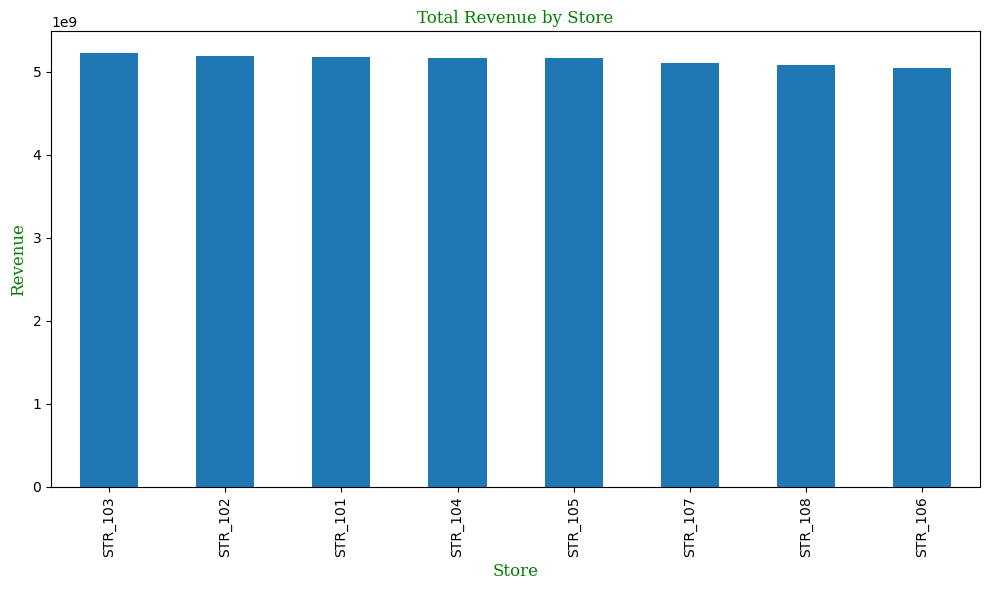

In [13]:
# Revenue by Store

store_sales = df.groupby("Store_ID")["Revenue"].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
store_sales.plot(kind = "bar")
plt.title("Total Revenue by Store", fontdict = font_settings)
plt.xlabel("Store", fontdict = font_settings)
plt.ylabel("Revenue", fontdict = font_settings)
plt.tight_layout()
plt.show()


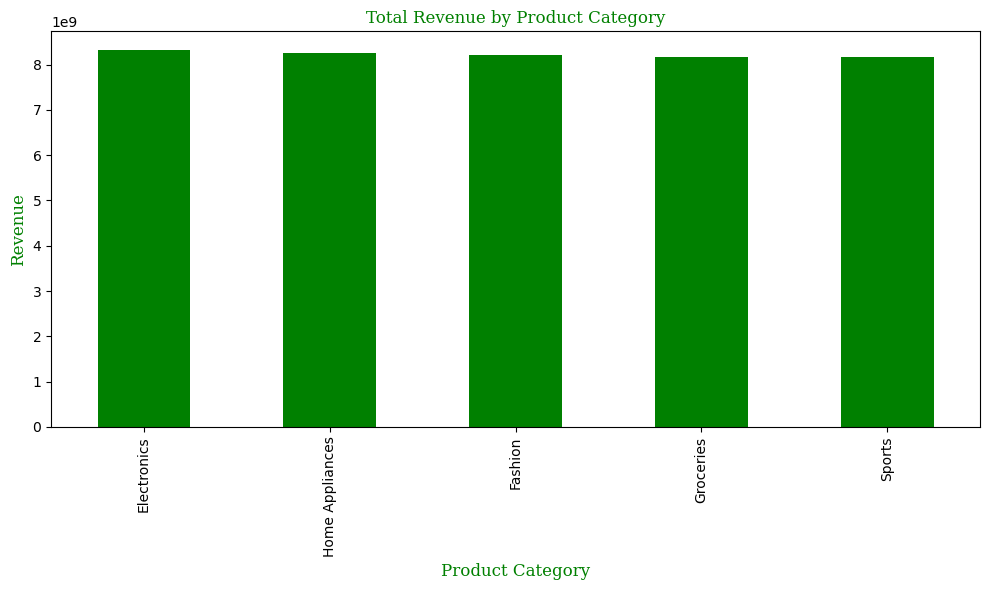

In [14]:
# Revenue by Product Category

category_sales = df.groupby("Product_Category")["Revenue"].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
category_sales.plot(kind = "bar", color = "green")
plt.title("Total Revenue by Product Category", fontdict = font_settings)
plt.xlabel("Product Category", fontdict = font_settings)
plt.ylabel("Revenue", fontdict = font_settings)
plt.tight_layout()
plt.show()

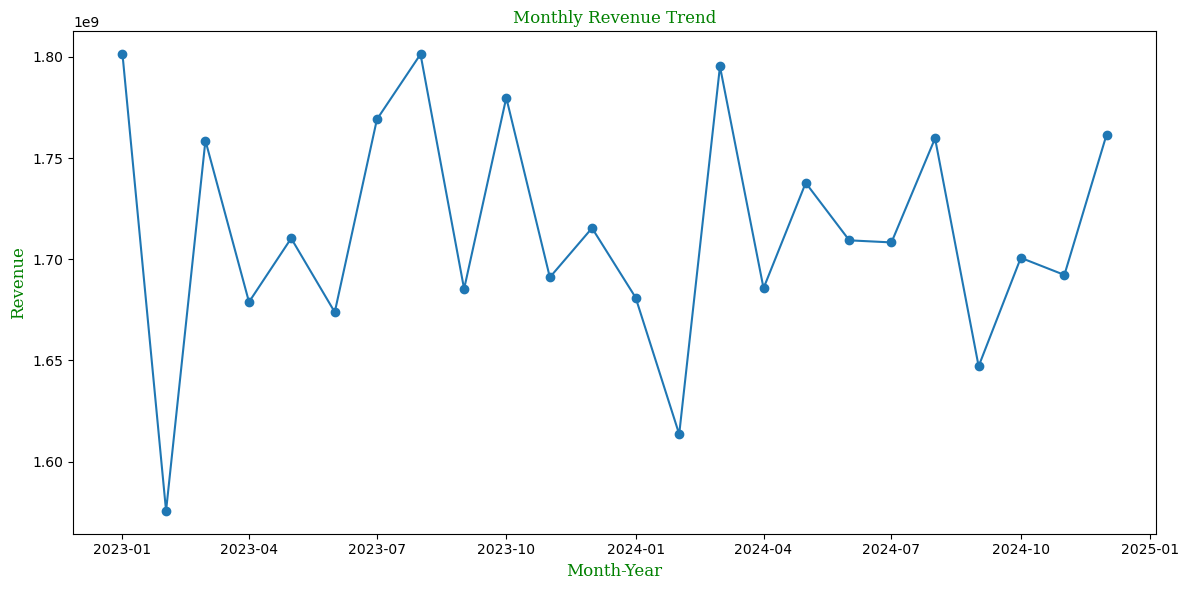

In [15]:
# Monthly Revenue Trend

monthly_sales = df.groupby(["Year", "Month"])["Revenue"].sum().reset_index()
monthly_sales["Month_Year"] = pd.to_datetime(monthly_sales[["Year", "Month"]].assign(DAY = 1))

plt.figure(figsize = (12,6))
plt.plot(monthly_sales["Month_Year"], monthly_sales["Revenue"], marker = "o")
plt.title("Monthly Revenue Trend", fontdict = font_settings)
plt.xlabel("Month-Year", fontdict = font_settings)
plt.ylabel("Revenue", fontdict = font_settings)
plt.tight_layout()
plt.show()

### 4️⃣ Store Segmentation with K-Means Clustering

In [16]:
# Aggregate store-level performance

store_perf = df.groupby("Store_ID").agg(
    total_revenue=("Revenue", "sum"),
    avg_daily_revenue=("Revenue", "mean"),
    total_quantity=("Units_Sold", "sum"),
    num_transactions=("Revenue", "count")
).reset_index()

store_perf.head()

,Store_ID,total_revenue,avg_daily_revenue,total_quantity,num_transactions
0,STR_101,5.169675e+09,571929.999654,226670,9039
1,STR_102,5.186277e+09,565323.371031,228384,9174
2,STR_103,5.223064e+09,569395.428301,229475,9173
3,STR_104,5.165937e+09,562370.724768,228580,9186
4,STR_105,5.161899e+09,557801.889115,227715,9254


In [17]:
# Features for clustering

features = store_perf[["total_revenue", "avg_daily_revenue", "total_quantity", "num_transactions"]]

# Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Trying different number of clusters

scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.474
k=3, silhouette=0.378
k=4, silhouette=0.335
k=5, silhouette=0.271
k=6, silhouette=0.263


In [18]:
# Choose optimal [k=3]

k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
store_perf["Cluster"] = kmeans.fit_predict(X_scaled)

store_perf.sort_values("Cluster", inplace=True)
store_perf.head(20)

,Store_ID,total_revenue,avg_daily_revenue,total_quantity,num_transactions,Cluster
3,STR_104,5.165937e+09,562370.724768,228580,9186,0
4,STR_105,5.161899e+09,557801.889115,227715,9254,0
6,STR_107,5.107832e+09,559088.474353,229403,9136,0
5,STR_106,5.040776e+09,559216.363151,223084,9014,1
7,STR_108,5.078322e+09,562757.310450,223994,9024,1
2,STR_103,5.223064e+09,569395.428301,229475,9173,2
0,STR_101,5.169675e+09,571929.999654,226670,9039,2
1,STR_102,5.186277e+09,565323.371031,228384,9174,2


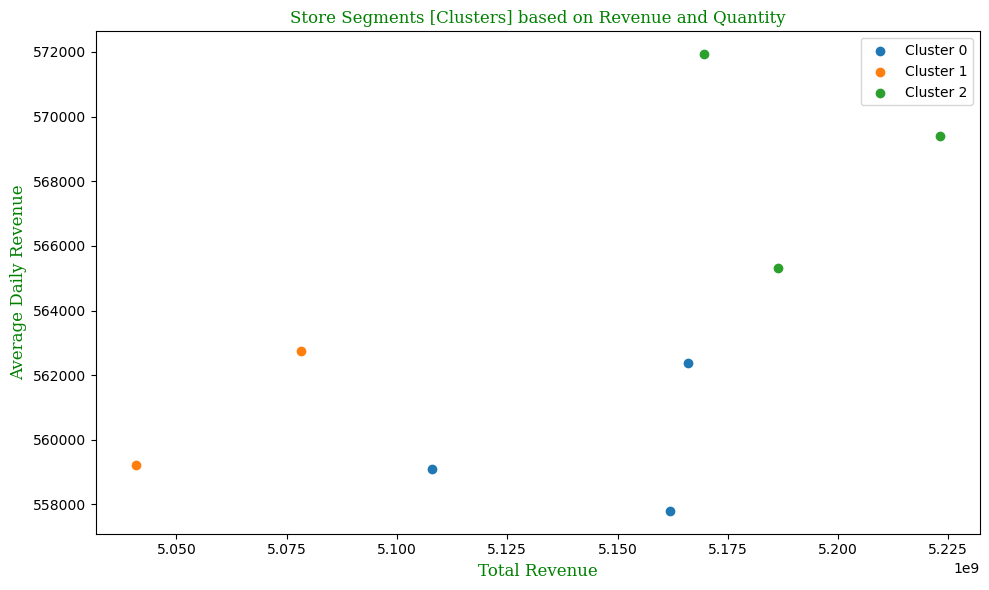

In [19]:
# Visualize 2 features

plt.figure(figsize=(10,6))
for cluster in range(k_opt):
    cluster_data = store_perf[store_perf["Cluster"] == cluster]
    plt.scatter(cluster_data["total_revenue"], cluster_data["avg_daily_revenue"], label=f"Cluster {cluster}")

plt.title("Store Segments [Clusters] based on Revenue and Quantity", fontdict = font_settings)
plt.xlabel("Total Revenue", fontdict = font_settings)
plt.ylabel("Average Daily Revenue", fontdict = font_settings)
plt.legend()
plt.tight_layout()
plt.show()

### 5️⃣ Time-Series Forecasting (SARIMAX)

In [20]:
# Using total daily revenue for time-series forecasting

ts = daily_sales.set_index("Date")["Revenue"]

In [21]:
# Train-Test Split [3 months as example]
split_point = int(len(ts) * 0.7)
train_ts = ts.iloc[:split_point]
test_ts = ts.iloc[split_point:]

print("Train size: ", len(train_ts))
print("Test size: ",len(test_ts))

Train size:  511
Test size:  220


In [22]:
# Simple SARIMAX Model

model = SARIMAX(train_ts, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,7)
                )
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Revenue   No. Observations:                  511
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8777.347
Date:                           Thu, 18 Dec 2025   AIC                          17564.694
Time:                                   15:25:36   BIC                          17585.796
Sample:                               01-01-2023   HQIC                         17572.972
                                    - 05-25-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0496      0.117     -0.424      0.672      -0.279       0.180
ma.L1         -0.7154      0.082     -8.705

In [23]:
# Forecast for test period

forecast = model_fit.get_forecast(steps=len(test_ts))
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

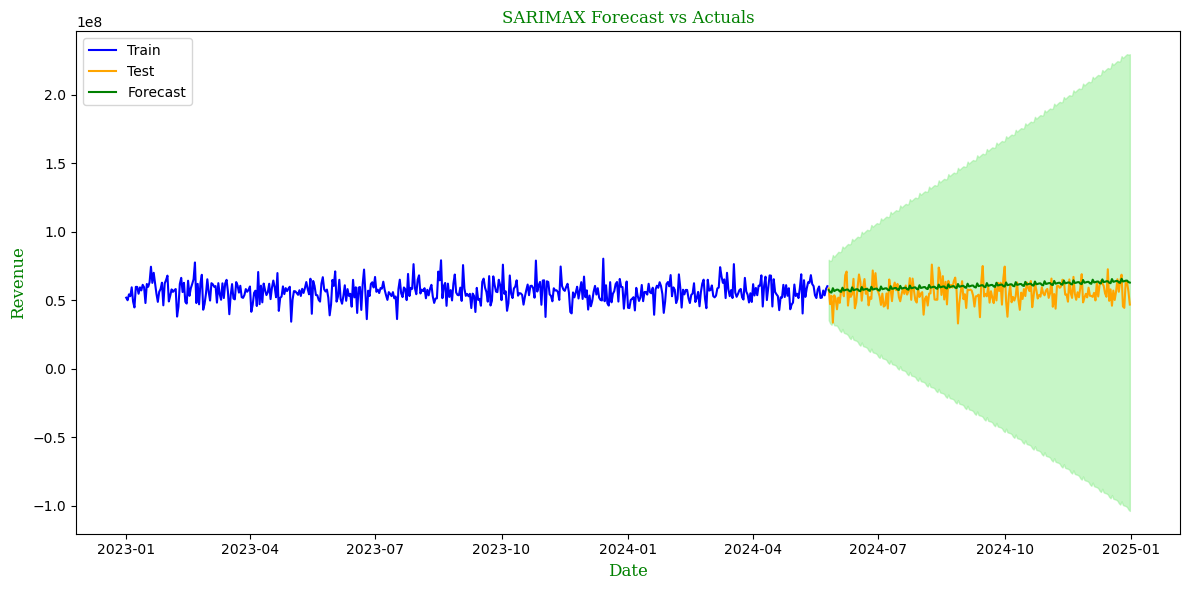

In [24]:
# Plot forecast vs actuals

plt.figure(figsize=(12,6))
plt.plot(train_ts.index, train_ts, label="Train", color="blue")
plt.plot(test_ts.index, test_ts, label="Test", color="orange")
plt.plot(pred_mean.index, pred_mean, label="Forecast", color="green")
plt.fill_between(pred_ci.index, 
                 pred_ci.iloc[:,0], 
                 pred_ci.iloc[:,1], color="lightgreen", alpha=0.5)
plt.title("SARIMAX Forecast vs Actuals", fontdict = font_settings)
plt.xlabel("Date", fontdict = font_settings)
plt.ylabel("Revenue", fontdict = font_settings)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Forecast error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_ts, pred_mean)
mse = mean_squared_error(test_ts, pred_mean)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 7382321.37
Mean Squared Error: 82594771222681.59


In [26]:
# Forecast for next 'n' days [Here n=30]

n_days = 30
future_forecast = model_fit.get_forecast(steps=n_days)
future_pred_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

print(future_pred_mean.head())

2024-05-26    5.757318e+07
2024-05-27    5.601707e+07
2024-05-28    5.571548e+07
2024-05-29    5.890145e+07
2024-05-30    5.678815e+07
Freq: D, Name: predicted_mean, dtype: float64


In [27]:
# Forecast for next 30 days
last_date = ts.index[-1]

future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)

future_forecast = model_fit.get_forecast(steps=30)
future_pred_mean = future_forecast.predicted_mean

future_pred_mean.index = future_dates

future_ci = future_forecast.conf_int()
future_ci.index = future_dates

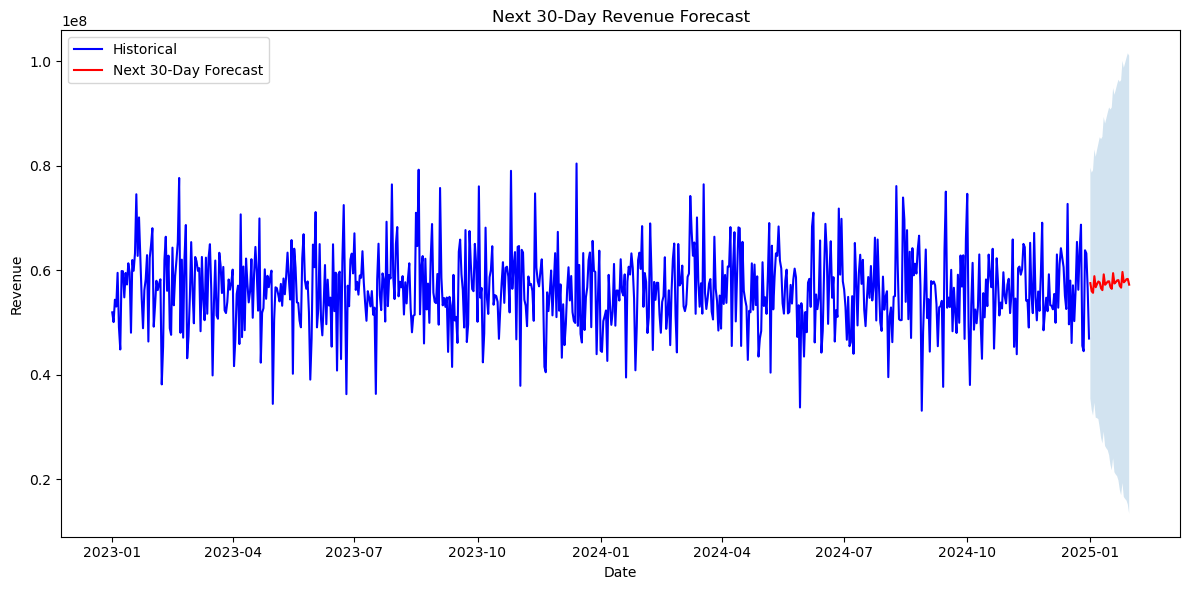

In [28]:
plt.figure(figsize=(12,6))

plt.plot(ts.index, ts, label="Historical", color="blue")
plt.plot(
    future_pred_mean.index,
    future_pred_mean,
    label="Next 30-Day Forecast",
    color="red"
)
plt.fill_between(
    future_dates,
    future_ci.iloc[:, 0],
    future_ci.iloc[:, 1],
    alpha=0.2
)

plt.title("Next 30-Day Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

- Export to Excel

In [29]:
store_perf.to_excel("Store_Clusters.xlsx", index=False)

In [30]:
forecast_df = future_pred_mean.reset_index()
forecast_df.columns = ["Date", "Forecasted_Revenue"]

forecast_df.to_excel("Sales_Forecast.xlsx", index=False)